<a href="https://colab.research.google.com/github/afshari-maryam/HuggingFace-learning/blob/main/2-transformer-working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Transformer architecture:
Attention Is All You Need
https://arxiv.org/abs/1706.03762


*    May 2020, GPT-3, an even bigger version of GPT-2 that is able to perform well on a variety of tasks without the need for fine-tuning (called zero-shot learning)

This list is far from comprehensive, and is just meant to highlight a few of the different kinds of Transformer models. Broadly, they can be grouped into three categories:

* GPT-like (also called auto-regressive Transformer models)
* BERT-like (also called auto-encoding Transformer models)
* BART/T5-like (also called sequence-to-sequence Transformer models)

All the Transformer models mentioned above (GPT, BERT, BART, T5, etc.) have been trained as language models. This means they have been trained on large amounts of raw text in a self-supervised fashion. Self-supervised learning is a type of training in which the objective is automatically computed from the inputs of the model. 

Each of these parts can be used independently, depending on the task:

* Encoder-only models: Good for tasks that require understanding of the input, such as sentence classification and named entity recognition.
* Decoder-only models: Good for generative tasks such as text generation.
* Encoder-decoder models or sequence-to-sequence models: Good for generative tasks that require an input, such as translation or summarization.

Transformer Details:
https://jalammar.github.io/illustrated-transformer/


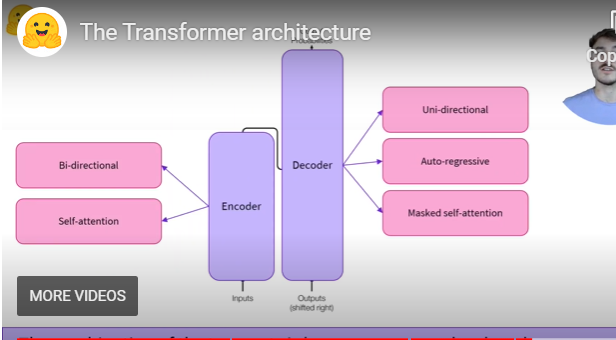